In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
raw_data=pd.read_csv('5.1 Categorical.csv')
raw_data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


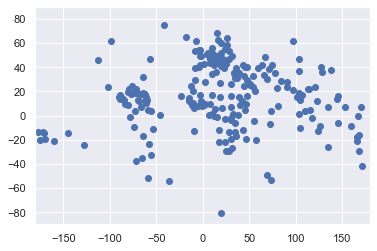

In [3]:
plt.scatter(raw_data['Longitude'], raw_data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [4]:

raw_data['continent']= raw_data['continent'].map({'Asia':0,'Oceania':1,'Antarctica':2,'Seven seas (open ocean)':3,'North America':4,'Europe':5,'Africa':6,'South America':7})

In [5]:
raw_data['continent']

0      4
1      0
2      6
3      4
4      5
      ..
236    1
237    0
238    6
239    6
240    6
Name: continent, Length: 241, dtype: int64

In [6]:
x=raw_data.iloc[:,1:4]

In [7]:
x.head()

,Longitude,Latitude,continent
0,-69.982677,12.520880,4
1,66.004734,33.835231,0
2,17.537368,-12.293361,6
3,-63.064989,18.223959,4
4,20.049834,41.142450,5


In [8]:
kmeans= KMeans(3)


In [9]:
x.describe(include='all')

,Longitude,Latitude,continent
count,241.000000,241.000000,241.000000
mean,14.215380,17.169377,3.597510
std,72.013654,26.554014,2.432384
min,-177.348348,-80.508579,0.000000
25%,-36.433184,1.358761,1.000000
50%,18.644925,17.277500,4.000000
75%,47.587005,39.115541,6.000000
max,171.484924,74.710513,7.000000


In [10]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
kmeans.inertia_

326175.83013324236

In [27]:
list=[]
list2=range(1,9)

In [28]:
for i in range(1,9):
    kmeans=KMeans(i)
    kmeans.fit(x)
    f=kmeans.inertia_
    list.append(f)

In [29]:
list

[1415279.6383406513,
 658400.7561868178,
 326175.83013324236,
 257447.5414239457,
 192983.74132081566,
 152443.19571554047,
 127139.98124038646,
 103241.93812992207]

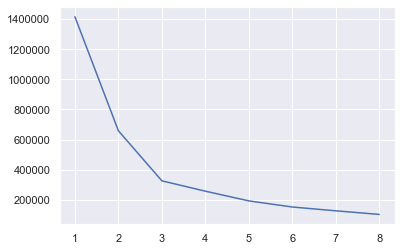

In [30]:
plt.plot(list2,list)

In [53]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-1.17162903e+00, -1.75422473e-01,  1.65815600e-01,
        -3.94305293e-01],
       [ 7.20656892e-01,  6.28927083e-01, -1.48208376e+00,
         1.62755802e+00],
       [ 4.62259746e-02, -1.11184903e+00,  9.89765281e-01,
         1.22318535e+00],
       [-1.07536833e+00,  3.97972772e-02,  1.65815600e-01,
        -3.94305293e-01],
       [ 8.11873327e-02,  9.04683012e-01,  5.77790440e-01,
        -1.20305062e+00],
       [ 7.98438762e-02,  1.62442844e+00,  5.77790440e-01,
        -1.20305062e+00],
       [-1.76094009e-01,  9.57509468e-01,  5.77790440e-01,
        -1.20305062e+00],
       [ 5.57786032e-01,  2.54195983e-01, -1.48208376e+00,
         1.62755802e+00],
       [-1.10479634e+00, -1.98313118e+00,  1.40174012e+00,
        -3.94305293e-01],
       [ 4.27397768e-01,  8.72495815e-01, -1.48208376e+00,
         1.62755802e+00],
       [-2.57337703e+00, -1.18774282e+00, -1.07010892e+00,
         4.14440031e-01],
       [ 7.93958337e-02, -3.68611847e+00, -6.58134082e-01,
      

In [54]:
kmeans=KMeans(6)
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [55]:
identified_cluster = kmeans.fit_predict(x_scaled)
identified_cluster

array([1, 3, 0, 1, 4, 4, 4, 3, 1, 3, 5, 0, 2, 0, 1, 2, 4, 3, 0, 4, 1, 1,
       2, 4, 3, 4, 1, 4, 1, 4, 1, 1, 1, 1, 1, 2, 2, 0, 1, 4, 1, 2, 1, 1,
       0, 1, 5, 1, 0, 1, 1, 1, 1, 1, 3, 3, 4, 4, 0, 1, 4, 1, 1, 1, 0, 0,
       4, 4, 0, 4, 2, 1, 4, 4, 2, 1, 4, 3, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1,
       2, 1, 2, 0, 1, 4, 1, 4, 2, 4, 2, 2, 0, 4, 3, 3, 4, 3, 4, 1, 4, 3,
       2, 3, 3, 0, 3, 2, 1, 1, 2, 4, 3, 2, 3, 1, 4, 1, 4, 2, 0, 4, 4, 4,
       2, 1, 1, 4, 4, 0, 2, 1, 2, 4, 1, 4, 2, 4, 2, 2, 0, 1, 1, 0, 0, 2,
       0, 2, 1, 2, 1, 1, 5, 4, 4, 2, 2, 2, 3, 3, 1, 5, 1, 2, 2, 2, 4, 1,
       2, 4, 1, 3, 5, 3, 4, 4, 0, 1, 3, 0, 0, 1, 2, 5, 1, 2, 1, 1, 4, 0,
       0, 4, 4, 1, 1, 4, 4, 4, 0, 1, 0, 3, 1, 1, 1, 2, 3, 3, 2, 5, 1, 4,
       3, 2, 0, 0, 4, 1, 1, 3, 4, 1, 1, 1, 1, 2, 2, 5, 5, 3, 0, 0, 0])

In [56]:
raw_data['cluster']=identified_cluster

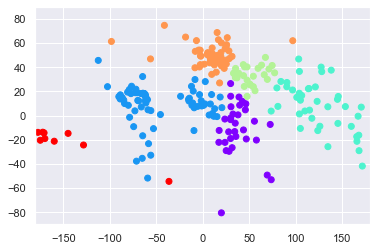

In [57]:
plt.scatter(raw_data['Longitude'], raw_data['Latitude'],c=raw_data['cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [58]:
raw_data

,name,Longitude,Latitude,continent,cluster
0,Aruba,-69.982677,12.520880,4,1
1,Afghanistan,66.004734,33.835231,0,3
2,Angola,17.537368,-12.293361,6,0
3,Anguilla,-63.064989,18.223959,4,1
4,Albania,20.049834,41.142450,5,4
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,1,5
237,Yemen,47.586762,15.909280,0,3
238,South Africa,25.083901,-29.000341,6,0
239,Zambia,27.774759,-13.458242,6,0
